<a href="https://colab.research.google.com/github/guptaa98/Kaggle-Notebooks/blob/master/Retail_Pulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/RetailPulseAssignmentData.xlsx', 
                 parse_dates=True)

# 1. Reading the data

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.1 Reading basic stats of data

In [ ]:
df.shape

(525461, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


* We can see that Quantity and Price have negative values which is not possible in real life. 
* There is a possibility that these two features contains outliers.

## 1.3 Checking for missing values

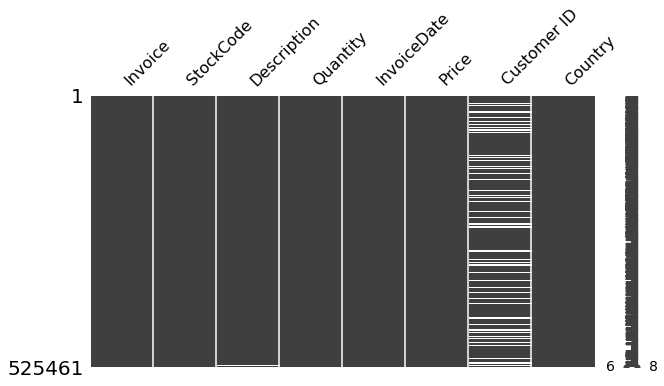

In [ ]:
import missingno
missingno.matrix(df, figsize=(10,5))

We can see that Customer Id feature contains a lot of missing values.

## 1.4 Check for duplicate records in dataframe

In [ ]:
df.duplicated().sum()

6865

* 6865 duplicate records 
* drop the duplicate records

In [ ]:
print(df[df.duplicated()].head())

    Invoice StockCode  ... Customer ID         Country
371  489517     21912  ...     16329.0  United Kingdom
383  489517     22130  ...     16329.0  United Kingdom
384  489517     22319  ...     16329.0  United Kingdom
385  489517     21913  ...     16329.0  United Kingdom
386  489517     21821  ...     16329.0  United Kingdom

[5 rows x 8 columns]


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

# 2. Univariate Analysis of every feature

### 2.1 Invoice 

In [ ]:
df.Invoice.value_counts()

537434     675
538071     652
537638     601
537237     597
536876     593
          ... 
505758       1
505754       1
C532359      1
505753       1
C500152      1
Name: Invoice, Length: 28816, dtype: int64

* If Invoice Code starts from 'C' then it refers to cancellation of that order.

In [ ]:
noc = 0
#indices = []
for index, row in df.iterrows():
  invoice = row['Invoice']
  invoice = str(invoice)
  if (invoice[0] == 'C'):
    noc += 1
    df.drop(index)
print(noc)

10182


* There are total 10182 orders cancelled. 

* We've removed such records.

In [ ]:
df.shape

(518596, 8)

### 2.2 Quantity

In [ ]:
df['Quantity'].describe()

count    410763.000000
mean         12.923735
std         102.039550
min       -9360.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

In [ ]:
len(df[df['Quantity'] < 0 ])

9816

* We can see that there are total 9816 items whose quantities are negative, which means they were cancelled. 
* We'll Remove such records

In [ ]:
for index, row in df.iterrows():
  if (row['Quantity'] < 0):
    df.drop(index)
print(df.shape)

(410763, 8)


### 2.3 StockCode

In [ ]:
df.StockCode.value_counts()

85123A    3199
22423     1862
85099B    1772
21212     1566
21232     1500
          ... 
90064A       1
84205C       1
79303A       1
78026        1
90163B       1
Name: StockCode, Length: 4031, dtype: int64

### 2.4 Price

In [ ]:
print(df['Price'].min())
print(df['Price'].max())

0.001
25111.09


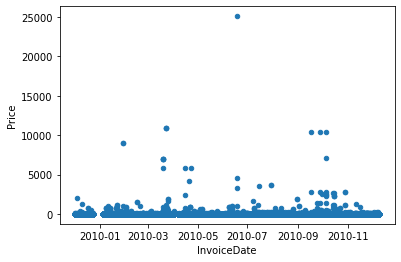

In [ ]:
df.plot(kind='scatter', y='Price',x='InvoiceDate') ;
plt.show()

* One of the conclusions that can be drawn is that we can see very high value of Prices during the year end. 

### 2.4 Country

In [ ]:
df.Country.value_counts()

United Kingdom          372705
EIRE                      8705
Germany                   8120
France                    5692
Netherlands               2768
Spain                     1271
Switzerland               1187
Belgium                   1053
Portugal                  1023
Channel Islands            906
Sweden                     882
Italy                      729
Australia                  654
Cyprus                     546
Austria                    537
Greece                     517
Denmark                    428
Norway                     369
Finland                    354
United Arab Emirates       318
Unspecified                280
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65
Korea   

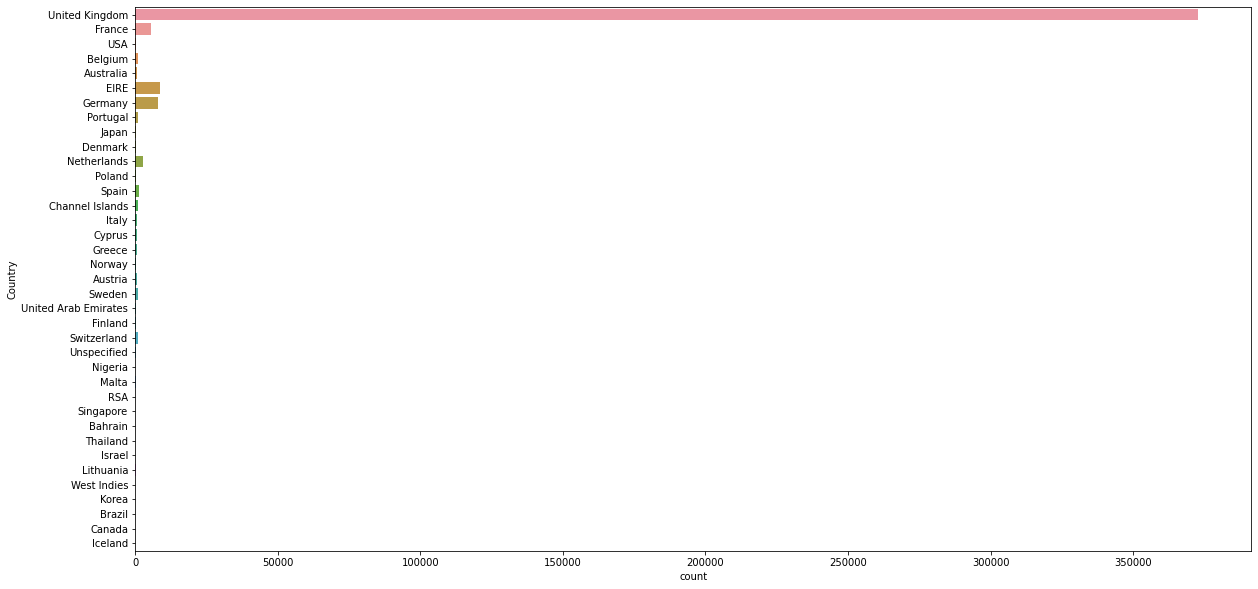

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Country',data = df);


### 2.5 Customer ID

In [ ]:
df['Customer ID'].isnull().sum()

107833

* We'll remove the records which contain null value for Customer ID as it is unique and there's no way to replace them. 

In [ ]:
df.dropna(inplace = True)

In [ ]:
df['Customer ID'].value_counts()

14911.0    5707
17841.0    5015
14606.0    3863
14156.0    2708
12748.0    2562
           ... 
13452.0       1
13096.0       1
16669.0       1
14120.0       1
17641.0       1
Name: Customer ID, Length: 4383, dtype: int64

* Customer ID refers to the id of a single customer. 
* Customer with ID = 14911 occurs max number of time. 
* It can be inferred that this customer has done maximum purchasing in the store.

In [ ]:
df[df['Customer ID'] == 14911].InvoiceDate.value_counts()

2010-10-03 12:40:00    112
2010-05-09 12:49:00    106
2010-06-14 14:06:00    101
2010-10-27 13:29:00     89
2010-03-30 09:47:00     79
                      ... 
2010-11-15 09:56:00      1
2010-10-21 18:47:00      1
2010-08-11 13:24:00      1
2010-10-04 12:15:00      1
2010-05-25 10:03:00      1
Name: InvoiceDate, Length: 267, dtype: int64

* There are 267 different dates when the customer with id = 14911 has engaged with store.


In [ ]:
df[df['Customer ID'] == 14911]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75,14911.0,EIRE
441,489520,72739B,WHITE CHOCOLATE SCENT CANDLE,12,2009-12-01 11:41:00,1.25,14911.0,EIRE
442,489520,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2009-12-01 11:41:00,3.95,14911.0,EIRE
443,489520,22212,FOUR HOOK WHITE LOVEBIRDS,6,2009-12-01 11:41:00,2.10,14911.0,EIRE
444,489520,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-01 11:41:00,6.75,14911.0,EIRE
...,...,...,...,...,...,...,...,...
523021,538009,21754,HOME BUILDING BLOCK WORD,3,2010-12-09 12:17:00,5.95,14911.0,EIRE
523022,538009,22840,ROUND CAKE TIN VINTAGE RED,2,2010-12-09 12:17:00,7.95,14911.0,EIRE
523023,538009,22842,BISCUIT TIN VINTAGE RED,2,2010-12-09 12:17:00,6.75,14911.0,EIRE
523024,538009,22197,SMALL POPCORN HOLDER,36,2010-12-09 12:17:00,0.85,14911.0,EIRE


* From the above, it can be observed that customer with id = 14911 has done the transactions in both the years 2009 and 2010.
* **Loyal Customer** - how willing a customer is to engage with and repeatedly purchase from you versus your competitors.
* Customer with Customer ID = 14911 can be called most loyal customer as he/she engaged with the store for both the years given in data.

### 2.6 InvoiceDate

In [ ]:
df.InvoiceDate.value_counts()

2010-12-06 16:57:00    675
2010-12-09 14:09:00    652
2010-12-07 15:28:00    601
2010-12-06 09:58:00    597
2010-12-03 11:36:00    593
                      ... 
2010-11-02 17:45:00      1
2010-05-14 13:39:00      1
2010-09-28 16:57:00      1
2010-06-30 09:41:00      1
2010-04-12 16:36:00      1
Name: InvoiceDate, Length: 25296, dtype: int64

In [ ]:
date_dict = df.InvoiceDate.value_counts()

In [ ]:
date_dict[0:20]

2010-12-06 16:57:00    675
2010-12-09 14:09:00    652
2010-12-07 15:28:00    601
2010-12-06 09:58:00    597
2010-12-03 11:36:00    593
2010-12-01 17:06:00    592
2010-12-08 14:25:00    591
2010-11-29 16:45:00    582
2009-12-03 14:39:00    580
2009-12-14 17:16:00    579
2010-12-06 10:08:00    568
2009-12-04 09:43:00    559
2009-12-14 17:57:00    548
2009-12-07 17:56:00    546
2010-12-07 18:36:00    536
2010-12-01 14:32:00    528
2009-12-02 14:43:00    518
2010-06-25 15:13:00    515
2009-12-07 18:02:00    507
2009-12-01 14:28:00    502
Name: InvoiceDate, dtype: int64

From above we can say that the year end of 2009 and 2010 are the most popular time of the year based on this data.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#df['month'] = df['InvoiceDate'].dt.month
#df['year'] = df['InvoiceDate'].dt.year
#df['day'] = df['InvoiceDate'].dt.day
#df.head()

In [ ]:
#df['hour'] = df['InvoiceDate'].dt.hour
#df['minute'] = df['InvoiceDate'].dt.minute
#df['second'] = df['InvoiceDate'].dt.second
#df.head()

In [ ]:
#df['Dates'] = pd.to_datetime(df['InvoiceDate']).dt.date
#df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


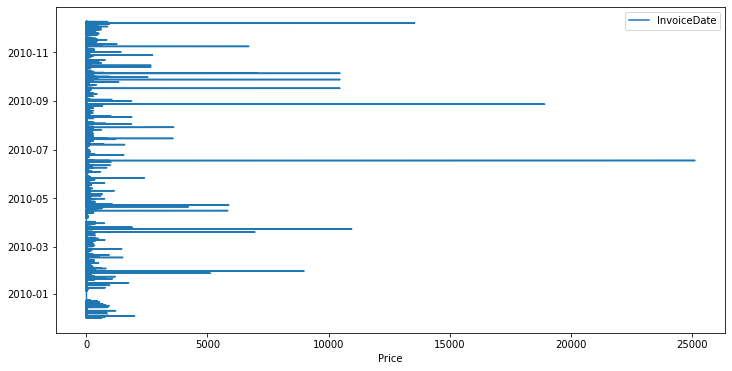

In [ ]:
df.plot(y = 'InvoiceDate', x = 'Price', figsize = (12,6))

* Yes, according to the graph above, we can see seasonality in data based on Date

In [ ]:
#df_prev = df[df['year'] == 2009]
#df_prev.plot(y = 'InvoiceDate', x = 'Price', figsize = (12,6))

In [ ]:
#df.plot(x = 'month', y = 'Price', figsize = (12,6))

Conclusion
* Higher value of prices during the year end.
* During the year end the two main events like Christmas and New Year are observed. 


### 2.7 Description

In [ ]:
desc_dict = df.Description.value_counts()

In [ ]:
desc_dict[0:20]

WHITE HANGING HEART T-LIGHT HOLDER    3503
REGENCY CAKESTAND 3 TIER              2202
STRAWBERRY CERAMIC TRINKET BOX        1807
PACK OF 72 RETRO SPOT CAKE CASES      1445
ASSORTED COLOUR BIRD ORNAMENT         1443
60 TEATIME FAIRY CAKE CASES           1378
HOME BUILDING BLOCK WORD              1359
JUMBO BAG RED RETROSPOT               1301
LUNCH BAG RED SPOTTY                  1259
JUMBO STORAGE BAG SUKI                1211
WOODEN FRAME ANTIQUE WHITE            1182
PACK OF 60 PINK PAISLEY CAKE CASES    1181
BAKING SET 9 PIECE RETROSPOT          1172
LUNCH BAG  BLACK SKULL.               1162
LUNCH BAG SUKI  DESIGN                1142
REX CASH+CARRY JUMBO SHOPPER          1140
HEART OF WICKER LARGE                 1133
LOVE BUILDING BLOCK WORD              1120
RED HANGING HEART T-LIGHT HOLDER      1109
JUMBO BAG STRAWBERRY                  1086
Name: Description, dtype: int64